<a href="https://colab.research.google.com/github/krishjoshi7/Pytorch-/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [84]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [85]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

# Importing dependencies

In [86]:
import torch
from torch import nn
#nn contains all of PyTorch's  building blocks for neural networks
import matplotlib.pyplot as plt


#check Pytorch Version
torch.__version__

'2.0.1+cu118'

# Data prepparing and Loading

Data can be almost anything ... in machine learning.
* Excel speadsheet
* Image of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text



Machine Learning is a game of two parts:
1. Get data into a numerical respresentation
2. Build a model to learn patterns in that numerical representation

TO showcase this, let's create some *known* data using the linear regression formula

we'll use linear regression formula to make a straight line with known parameters.

# BUILDING DATASET

In [87]:
# create *known* parameters
weight = 0.7
bias = 0.3
# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze add extra dimension
y = weight*X + bias
# Y = m(x) + c




In [88]:
X[:10],

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),)

In [89]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [90]:
len(X), len(y)

(50, 50)

# Split data into train and test set

Let's create a training test set with our data.

In [91]:
# Create a train/test split
train_split = int(0.8*len(X))
train_split

40

In [92]:
x_train, y_train = X[: train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

In [93]:
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

# Creating visualize representation

In [94]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

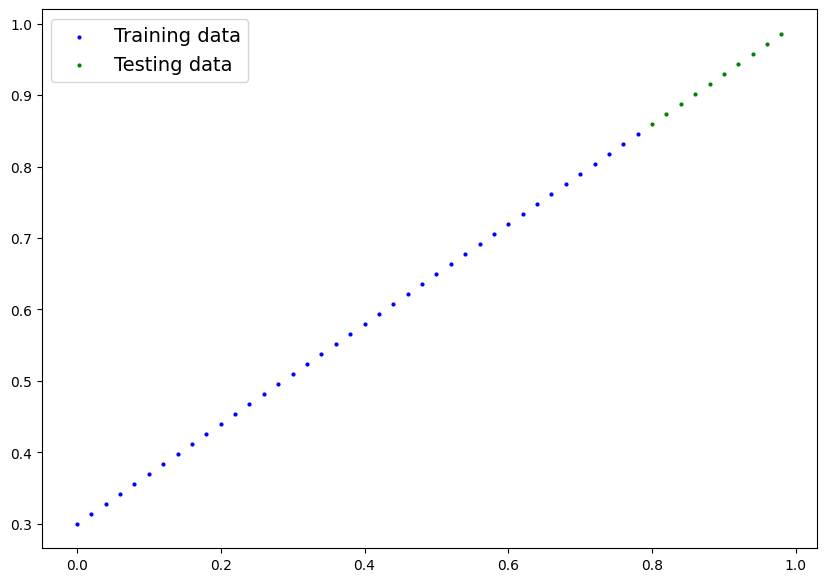

In [95]:
plot_predictions()

# Building the model

* Our frist PyTorch model !



* We will use linear Regression model

* We are going to be building classes throughout the course
* I'd recommend getting familiar with OOP in python, to do so we can use resource from real python



# What our model does :
* Start with random values (weights & bias)
* Look at training data and adjust the randomvalues to better represent data and adjust randomvalues to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

# How does it do so ?

* Through two main algorithms:
1. Gradient descent
2. Backpropogation

In [96]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their uses cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).

* torch.nn - contains all of the building for computational graphs (a nueral network can be considered a computational graph)
* torch.nn.parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set this for us
* torch.nn.module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.module subclass require you to overwrite forward() this method defines what happens in forward computation

In [97]:
torch.manual_seed(42)
torch.rand(1)

tensor([0.8823])

# Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

soo we check our model parameters or what's inside our model using `.parameters()`

In [98]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Moduel)
model_1 = LinearRegressionModel()

# Check out the parameters
model_1.parameters()



<generator object Module.parameters at 0x7d7355dfa490>

In [99]:
# Converting the generator to list
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [100]:

# list named parameters
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [101]:
weight, bias

(0.7, 0.3)

# Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predict `y_test`` based on `x_text`

When we pass data through our model, it's going to run it through the `forward()` method

In [102]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [103]:
# make prediction with model
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

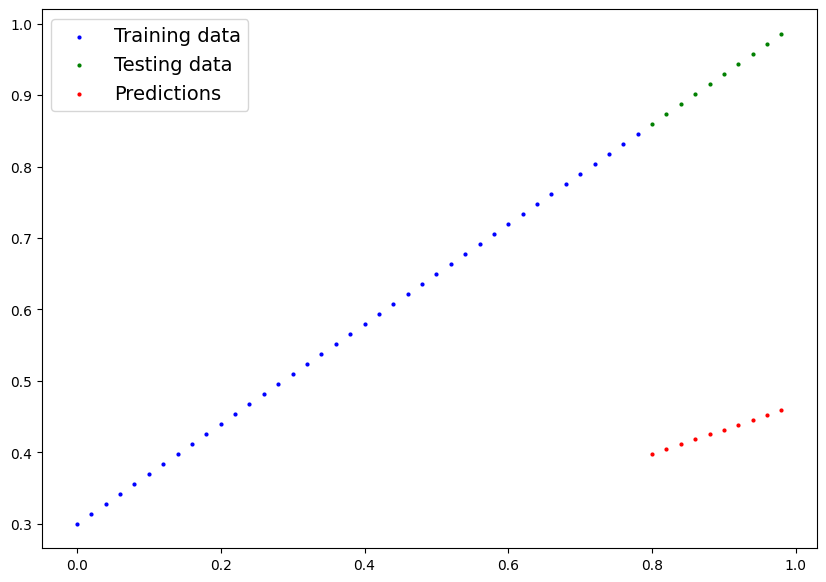

In [104]:
plot_predictions(predictions=y_preds)

# Train model

* The whole idea of training is for a model to move from some *unknown parameters (these may be random ) to some *known* parameters

* Or in other words from poor represenataion of the data to better representation of the data

* One way to measure how poor or how wrong your models predictions are to use a loss function.

* Note : loss function may also be called cost function or criterion in different areas. For our case, we're going to to refer to it as a loss function


Things we need to train :
#Loss Function:

 A function to measure how wrong your model's predictions are to the ideal outputs
 * the lower the better

# Optimizers
 Takes into account the loss of a model and adjust the model's parameters (eg. weights & bias in our case to improve the loss function.)

 * And specially for PyTorch, we need
 * A training loop
 * A testing loop

In [105]:
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [106]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#  Loss function
* L1 lose is mean absolute error (MAE) between each element in the input x and target y

* L2 Loss is mean square error (MSE)

These are use for regression problem


# Optimizer

To see different type of optimizers algo visit :- https://pytorch.org/docs/stable/optim.html

* A parameter is a value that the model sets iself
* lr = Learning Rate = possibly the most important hyperparameter that we set
* Smaller the learning rate the smaller the change in parameter
* The larger the learning rate the larger the change in parameter

In [107]:
# setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer  (Stochastic (random) gradient descent)
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01) # lr = learning rate


# Building the training (and a testing loop) in  PyTorch

* A couple of things we need in a training loop :
0. Loop through the data
1. forward pass (this involes data moving through our model's `forwrd()`
function) to make prediction ob data - also known as **forward propogation**
2. calculate the loss (compare forward pass prediction to ground truth labels )
3. Optimizer zero grad
4. loss backward - moves backwards through the network to calculate the gradient of each of the parameter of our model with respect to the loss - it is also known as **back propogation**
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**graident descent**)
gradient is also known as slope

In [108]:
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [109]:
torch.manual_seed(42)
# An epoch is one loop through the data (this is a hyperparameter because we set it ourselves)

epochs = 10

### Training

# 0. loop through the data ..
for ephoch in range (epochs) :
  # set the model to training mode
  model_1.train() # train mode in PyTorch set all parameters that require gradients to require gradients

  # 1.Forward pass
  y_pre = model_1(x_train)

  # 2 calculate the loss (MAE)
  loss = loss_fn(y_pre, y_train) # as per document we will use input frist and target next

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4 Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer change will acculumate through the loop so. we have to zero them above in step 3 for the next iteration of the loop
  model_1.eval() # turns off gradient tracking


To create these we're going to write a Python `for` loop in the theme of the [unofficial PyTorch optimization loop song](https://twitter.com/mrdbourke/status/1450977868406673410?s=20) (there's a [video version too](https://youtu.be/Nutpusq_AFw)).

![the unofficial pytorch optimization loop song](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png)
*The unoffical PyTorch optimization loops song, a fun way to remember the steps in a PyTorch training (and testing) loop.*

There will be a fair bit of code but nothing we can't handle.

### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* stepping them (`optimizer.step()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.


In [110]:
with torch.inference_mode():
  y_preds_new = model_1(x_test)

In [111]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

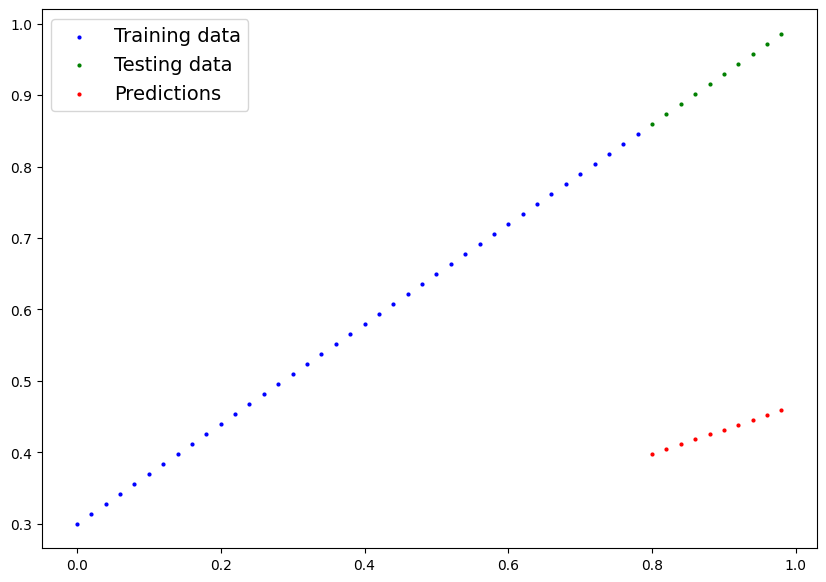

In [112]:
plot_predictions(predictions=y_preds)

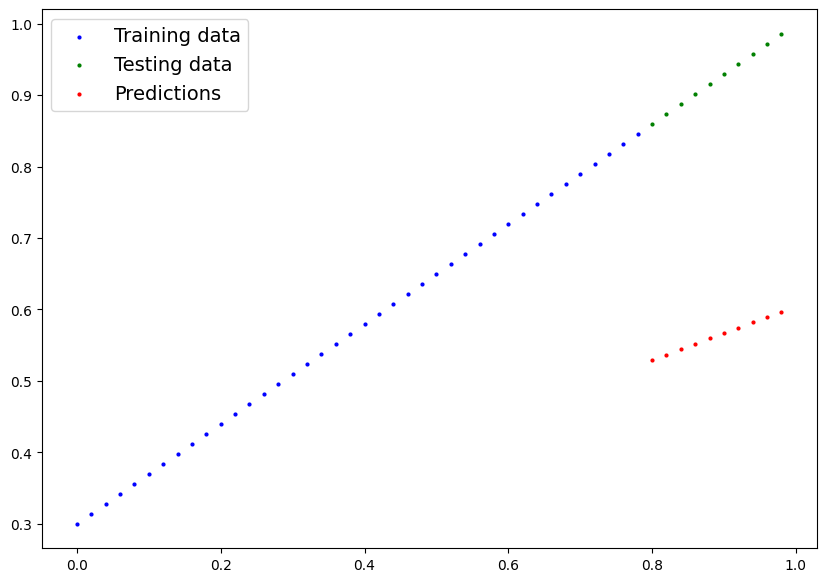

In [113]:
plot_predictions(predictions=y_preds_new)